# Capstone Project - The Battle of Neighborhoods

## Introduction

This project aims to utilize all Data Science Concepts learned in the Data Science Professional Course. We define a Business Problem, the data that will be utilized and using that data, we are able to analyze it using Machine Learning tools. In this project, we will go through all the processes in a step by step manner from problem designing, data preparation to final analysis and finally will provide a conclusion that can be leveraged by the business stakeholders to make their decisions

## Table of Contents

<font size = 3>

1. <a>Background & Problem Description</a>

2. <a>Data Description</a>

3. <a>Methodology</a>

4. <a>Machine Learning</a>

5. <a>Data Analysis</a>
    
6. <a>Discussion and Conclusion</a>    
</font>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

#import yellowbrick
!conda install -c districtdatalabs yellowbrick --yes
# install KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics 
from scipy.spatial.distance import cdist
from sklearn.datasets import make_blobs

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

!conda install -c anaconda beautifulsoup4  --yes
!conda install -c anaconda lxml    --yes

print('All Libraries are imported!')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |           py36_0         168 KB  anaconda
    ca-certificates-2020.6.24  |                0         133 KB  anaconda
    certifi-2020.6.20          |           py36_0         160 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    soupsieve-2.0.1            |             py_0          33 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.3 MB

The following 

## 1. Background & Problem Description

   Gone are the days when gyms targeted only a small segment of the population. Nowadays, gyms are attracting more members. Members can choose a low-budget gym and still get a good sweat in or they could opt for a smaller, more specialized boutique studio to meet their specific fitness goals. Plus, there are 24-hour fitness centres popping up nationwide to make going to the gym is a lot more convenient for today’s consumers. Revenue for the Gym, Health and Fitness Clubs industry in Canada has grown over the five years to 2020 as a result of consumer trends and the proliferation of public health campaigns. With an increasing rate of adult obesity expected during the period, the Public Health Agency of Canada (PHAC) has stressed adherence to fitness and healthy lifestyle choices. According to the PHAC and the Canadian Institute for Health Information, obesity is expected to incur more than $5.0 billion in costs each year, which must be covered by the healthcare system.

The objective of this project is to determine what might be the ‘best’ neighbourhood in Toronto to open a GYM/Fitness Centre".Will use Foursquare location data and regional clustering of venue information to determine the ‘best’ neighbourhood in Toronto to open a GYM/Fitness Centre.  we will find the most suitable location for an entrepreneur to open a new GYM/Fitness Centre in Toronto, Canada.

### Target Audience

Information Provided by this report would be useful for People who wants open GYM/Fitness Centre in Toronto, Canada.The Objective is to locate and recommed to People which neighborhood of Toronto will be the best choice to open GYM/Fitness Centre.

## 2. Data Description

To consider the objective stated above, we can list the below data sources used for the analysis

i) Toronto Neighborhood Data: The following Wikipedia page was scraped to pull out the necessary information: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

The information obtained i.e. the table of postal codes was transformed into a pandas data frame for further analysis.

ii) Coordinate data for each Neighborhood in Toronto: The following csv file gave us the geographical coordinates of each postal code:  http://cocl.us/Geospatial_data

iii)Venue Data in Toronto,Canada. Geographical Coordinates data will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each neighborhood. We will use Foursquare API to explore neighborhood in Toronto,Canada.

## 3. Methodology

we used the BeautifulSoup package to transform the data in the table on the Wikipedia page into the pandas dataframe. After all the data was collected and put into data frames, cleansing and merging of the data was required to start the process of analysis. When getting the data from Wikipedia, there were Boroughs that were not assigned to any neighbourhood therefore, the following assumptions were made,

Only the cells that have an assigned borough will be processed. Borough’s that were not assigned get ignored

More than one neighbourhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighbourhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighbourhoods separated with a comma

If a cell has a borough but a Not assigned neighbourhood, then the neighbourhood will be the same as the borough

In [2]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(r.content,features="lxml")

tbls=soup.find_all('table')
#print(tbls[0])
ths=tbls[0].find_all('th')
#print(ths)
headers=[]
Postal_Code=[]
Borough=[]
Neighborhood=[]

for th in ths:
    headers.append(str(th.get_text(strip=True)))
#print(headers)
trs = tbls[0].find_all('tr')
for tr in trs:
    tds = tr.find_all("td")
    try:
        Postal_Code.append(str(tds[0].get_text(strip=True)))
        Borough.append(str(tds[1].get_text(strip=True)))
        Neighborhood.append(str(tds[2].get_text(strip=True)))
    except:
        continue    

In [3]:
import pandas as pd
df_Toronto = pd.DataFrame(list(zip(Postal_Code, Borough,Neighborhood)),columns =headers)
Values=df_Toronto['Borough']!='Not assigned'
df_Toronto_New=df_Toronto[Values]
df_Toronto_New.reset_index(drop=True, inplace=True)
df_Toronto_New.rename(columns = {'Neighbourhood':'Neighborhood'}, inplace = True) 
df_Toronto_New.shape
df_Toronto_New.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


### Load & Explore Geo Cordinate Data

The second source of data provided  with the Geographical coordinates of the neighbourhoods with the respective Postal Codes. The file was in CSV format, so we had to attach it to a Pandas data frame, we merged the two tables together based on Postal Code.

In [4]:
Sources='https://cocl.us/Geospatial_data'
GeoData=pd.read_csv(Sources)
df_newsc = pd.merge(df_Toronto_New, GeoData, how='left', on=['Postal Code', 'Postal Code'])

In [5]:
# Use geopy library to get the latitude and longitude values of Toronto
address = 'Toronto'
geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


In [6]:
# Define Foursquare Credentials and Version
CLIENT_ID = '5N5FHAPLUV3BTIOOGSLP324U5MP5VVFH0HVI0F1PXBO50WZJ' 
CLIENT_SECRET = 'AZM3EKAAJAIPE13IHZDGEIC3K1NZS1OCTV4FGYO255B4YVGE'
VERSION = '20180605'

#Toronto_data = df_newsc[df_newsc['Borough'] == 'Downtown Toronto'].reset_index(drop=True)
Toronto_data = df_newsc.reset_index(drop=True)
Toronto_data.head()
#Toronto_data.sort_values(by=['Borough'])

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


We then use the python folium library to visualize geographic details of Toronto and its boroughs. Created a map of Toronto with boroughs superimposed on top using the latitude and longitude values to get the visual as below

In [7]:
# create map of Toronto using latitude and longitude values
map_Toronto= folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Toronto)  

map_Toronto 

we are going to start utilizing the Foursquare API to explore the neighborhood venues and segment them. We set the LIMIT parameter to 100, which would limit the number of venues returned by the Foursquare API and the radius of 500 meter. Getting this data was crucial to analyzing the number of GYM/Fitness Centre all over Toronto.Then we merged the Foursquare Venue data with the Neighborhood data which then gave us the nearest Venue for each of the Neighborhoods.

In [8]:
radius= 500
LIMIT=100
def getNearbyVenues(Borough,names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for Brh, name, lat, lng in zip(Borough,names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([( Brh,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough','Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [9]:
Toronto_Venues = getNearbyVenues(Borough=Toronto_data['Borough'],
                                   names=Toronto_data['Neighborhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude'])
Toronto_Venues.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,North York,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,North York,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,North York,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
4,North York,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


## 4. Machine Learning

Then to analyze the data we performed a technique in which Categorical Data is transformed into Numerical Data for Machine Learning algorithms. This technique is called One hot encoding. For each of the neighbourhoods, individual venues were turned into the frequency at how many of those Venues were located in each neighbourhood. Then we grouped those rows by Neighborhood and by taking the average of the frequency of occurrence of each Venue Category

In [10]:
# one hot encoding
Toronto_onehot = pd.get_dummies(Toronto_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Toronto_onehot['Neighborhood'] = Toronto_Venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Toronto_onehot.columns[-1]] + list(Toronto_onehot.columns[:-1])
Toronto_onehot = Toronto_onehot[fixed_columns]
Toronto_grouped = Toronto_onehot.groupby('Neighborhood').mean().reset_index()
Toronto_grouped.head()

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

After, we created a new data frame that only stored the Neighborhood names as well as the mean frequency of GYM/Fitness Centre in that Neighborhood. This allowed the data to be summarized based on each individual Neighborhood and made the data much simpler to analyze. We combine Both GYM & Fitness Centre Venues for better idenfitication and Analysis.

In [11]:
Toronto_GYM=Toronto_grouped[['Neighborhood','Gym', 'Gym / Fitness Center']]
Toronto_GYM['GYM_T'] = Toronto_GYM.loc[:,['Gym','Gym / Fitness Center']].sum(axis=1)
Toronto_GYM.drop(Toronto_GYM.columns[[1,2]], axis = 1, inplace = True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
Toronto_GYM.head()

,Neighborhood,GYM_T
0,Agincourt,0.000000
1,"Alderwood, Long Branch",0.111111
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000
3,Bayview Village,0.000000
4,"Bedford Park, Lawrence Manor East",0.000000


#### K-Means Clustering

we used K-Means clustering. To get our optimum K value that was neither overfitting or underfitting the model, we used the Elbow Point Technique. In this technique, we ran a test with different number of K values and measured the accuracy and then chose the best K value. The best K value is chosen at the point in which the line has the sharpest turn. In our case, we had the Elbow Point at K = 4. That means we will have a total of 5 clusters.

In [14]:
from sklearn.preprocessing import StandardScaler
X = Toronto_GYM.drop(['Neighborhood'], axis=1)
Clus_dataSet = StandardScaler().fit_transform(X)

In [16]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,19)
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(Clus_dataSet) 
    kmeanModel.fit(Clus_dataSet)     
      
    distortions.append(sum(np.min(cdist(Clus_dataSet, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / Clus_dataSet.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(Clus_dataSet, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / Clus_dataSet.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


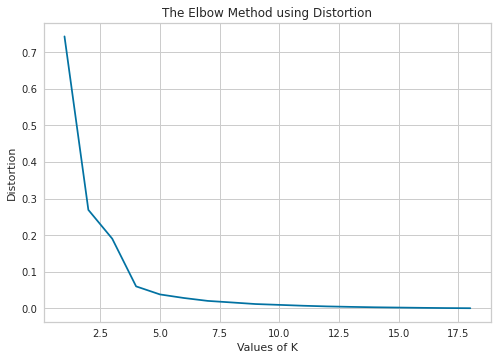

In [17]:
#for key,val in mapping1.items(): 
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

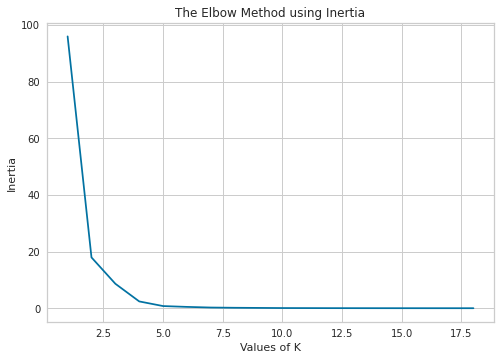

In [18]:
#for key,val in mapping2.items(): 
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

Then we used a model that accurately pointed out the optimum K value. We imported ‘KElbowVisualizer’ from the Yellowbrick package. Then we fit our K-Means model above to the Elbow visualizer

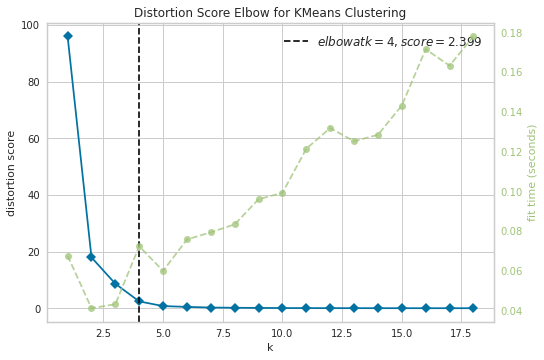

In [19]:
# Instantiate the clustering model and visualizer
model =KMeans()
visualizer = KElbowVisualizer(model, k=(1,19))

visualizer.fit(Clus_dataSet)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

We just integrated a model that would fit the error and calculate the distortion score. From the dotted line, we see that the Elbow is at K=4. Moreover, in K-Means clustering, objects that are similar based on a certain variable are put into the same cluster.

Each of these clusters was labelled from 0 to 3 as the indexing of labels begins with 0 instead of 1

After, we merged the venue data with the table above creating a new table which would be the basis for analyzing new opportunities for opening a GYM/Fitness Centre in Toronto. Then we created a map using the Folium package in Python and each neighbourhood was coloured based on the cluster label

In [20]:
# set number of clusters
kclusters=4
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]


array([0, 2, 0, 0, 0, 3, 0, 1, 1, 0], dtype=int32)

In [21]:
# add clustering labels
Toronto_GYM.insert(2, 'Cluster Labels', kmeans.labels_)
Toronto_GYM.head()

,Neighborhood,GYM_T,Cluster Labels
0,Agincourt,0.000000,0
1,"Alderwood, Long Branch",0.111111,2
2,"Bathurst Manor, Wilson Heights, Downsview North",0.000000,0
3,Bayview Village,0.000000,0
4,"Bedford Park, Lawrence Manor East",0.000000,0


In [22]:
Toronto_merged=Toronto_Venues
Toronto_merged = Toronto_merged.join(Toronto_GYM.set_index('Neighborhood'), on='Neighborhood')
Toronto_merged.sort_values(["Cluster Labels"], inplace=True)
print(Toronto_merged.shape) # check the last columns!

(2137, 10)


In [23]:
Toronto_merged.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels
0,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,0.0,0
1480,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,Domani Restaurant & Wine Bar,43.649235,-79.450229,Italian Restaurant,0.0,0
1479,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,Revue Cinema,43.651112,-79.450961,Movie Theater,0.0,0
1478,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,Inter Steer,43.649796,-79.450310,Eastern European Restaurant,0.0,0
1477,West Toronto,"Parkdale, Roncesvalles",43.648960,-79.456325,The Chocolateria,43.649928,-79.450437,Dessert Shop,0.0,0


In [24]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
rainbow = ['Purple', 'red', 'green','Orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Neighborhood Latitude'], Toronto_merged['Neighborhood Longitude'],Toronto_merged['Neighborhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
       radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

## 5. Data Analysis

### Analysis of each Cluster

#### Cluster 1

Cluster-1 had 216 unique Venue Catergories. Cluster 1 is not having any GYM or Fitness Center.
But Cluster-1 is having highest no of Neighborhood in it. Cluster-1 having 70 Neighborhoods and 9 Boroughs. 
In that North York is having 17 neighborhoods and Scarborough having 16 neighborhoods.

In [29]:
Toronto_Cluster1=Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0, Toronto_merged.columns[[0] + list(range(1,Toronto_merged.shape[1]))]]
Toronto_Cluster1.sort_values(['GYM_T'], ascending=False, inplace=True)
Toronto_Cluster1.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels
0,North York,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park,0.0,0
2069,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,The Anndore House,43.668801,-79.385413,Hotel,0.0,0
2081,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,Cawthra Square Dog Park,43.666583,-79.380040,Dog Run,0.0,0
58,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,Suzy Shier,43.718846,-79.465906,Clothing Store,0.0,0
2080,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,NC Salon +,43.669406,-79.386748,Health & Beauty Service,0.0,0


In [30]:
print('There are {} uniques categories.'.format(len(Toronto_Cluster1['Venue Category'].unique())))
Toronto_Cluster1[(Toronto_Cluster1['Venue Category']=='Gym')|(Toronto_Cluster1['Venue Category']=='Gym / Fitness Center')]

There are 216 uniques categories.


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels


#### Cluster 2

Cluster-2 had 13 Neighborhoods and 129 unique Venue Catergories across 8 different Boroughs.26 venue location in Cluster-2 is having GYM or Fitness Center. which is highest amoung all 4 Clusters. Downtown Toronto is having highest of 15 GYM or Fitness Center in it. Cluster-2 had average GYM or Fitness Center rate as 0.05

In [31]:
Toronto_Cluster2=Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1, Toronto_merged.columns[[0] + list(range(1,Toronto_merged.shape[1]))]]
Toronto_Cluster2.sort_values(['GYM_T'], ascending=False, inplace=True)
Toronto_Cluster2.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels
1498,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,Anoush,43.636769,-79.620840,Mediterranean Restaurant,0.076923,1
1490,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,Hilton Garden Inn,43.638519,-79.618721,Hotel,0.076923,1
1745,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.605647,-79.501321,Hex-Mex,43.601261,-79.502284,Mexican Restaurant,0.076923,1
1743,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.605647,-79.501321,Sense Appeal,43.601729,-79.501063,Café,0.076923,1
1742,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.605647,-79.501321,Pet Valu,43.602431,-79.498653,Pet Store,0.076923,1


In [32]:
print('There are {} uniques categories.'.format(len(Toronto_Cluster2['Venue Category'].unique())))
Toronto_Cluster2[(Toronto_Cluster2['Venue Category']=='Gym')|(Toronto_Cluster2['Venue Category']=='Gym / Fitness Center')].head()

There are 129 uniques categories.


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels
1501,Mississauga,Canada Post Gateway Processing Centre,43.636966,-79.615819,LA Fitness,43.637794,-79.621765,Gym,0.076923,1
1744,Etobicoke,"New Toronto, Mimico South, Humber Bay Shores",43.605647,-79.501321,Crossfit Colosseum,43.604816,-79.507024,Gym,0.076923,1
697,West Toronto,"Dufferin, Dovercourt Village",43.669005,-79.442259,Planet Fitness,43.667588,-79.442574,Gym / Fitness Center,0.071429,1
2135,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym,0.066667,1
1361,North York,Downsview,43.761631,-79.520999,Planet Fitness,43.757538,-79.519610,Gym / Fitness Center,0.058824,1


#### Cluster 3

Cluster-3 had 31 unique venue Catergories in 3 neighborhoods. had 5 venue location is having GYM or Fitness Centre in it. with an average rate of 0.111, which is highest amoung all 4 clusters. Which means Cluster-3 is having highest average rate of GYM or Fitness Center eventhough it had 3 Neighborhoods.


In [33]:
Toronto_Cluster3=Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2, Toronto_merged.columns[[0] + list(range(1,Toronto_merged.shape[1]))]]
Toronto_Cluster3.sort_values(['GYM_T'], ascending=False, inplace=True)
Toronto_Cluster3.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels
233,North York,Don Mills,43.725900,-79.340923,Harvey's,43.726603,-79.341035,Restaurant,0.111111,2
218,North York,Don Mills,43.725900,-79.340923,Oomomo,43.726429,-79.343283,Discount Store,0.111111,2
1872,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,Toronto Gymnastics International,43.599832,-79.542924,Gym,0.111111,2
230,North York,Don Mills,43.725900,-79.340923,Genghis Khan Mongolian Grill,43.726906,-79.341216,Asian Restaurant,0.111111,2
237,North York,Don Mills,43.725900,-79.340923,Barber Greene Square,43.727654,-79.340810,Shopping Mall,0.111111,2


In [34]:
print('There are {} uniques categories.'.format(len(Toronto_Cluster3['Venue Category'].unique())))
Toronto_Cluster3[(Toronto_Cluster3['Venue Category']=='Gym')|(Toronto_Cluster3['Venue Category']=='Gym / Fitness Center')].head()

There are 31 uniques categories.


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels
1872,Etobicoke,"Alderwood, Long Branch",43.602414,-79.543484,Toronto Gymnastics International,43.599832,-79.542924,Gym,0.111111,2
103,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,East York Gymnastics,43.710654,-79.309279,Gym / Fitness Center,0.111111,2
99,North York,Don Mills,43.745906,-79.352188,LA Fitness,43.747665,-79.347077,Gym,0.111111,2
219,North York,Don Mills,43.725900,-79.340923,Fitness Connection,43.727473,-79.341707,Gym,0.111111,2
231,North York,Don Mills,43.725900,-79.340923,GoodLife Fitness North York Don Mills and Egli...,43.722704,-79.337508,Gym,0.111111,2


#### Cluster 4

Cluster-4 had 155 unique Venue Catergories in that 15 venue location contains GYM or Fitness Center.Though Average Rate of GYM in Cluster-4 is 0.02 which is having 2nd highest numbers of GYM in it.
Downtown Toronto is having 13 GYM and East Toronto and west Toronto contains one GYM or Fitness Center each.


In [35]:
Toronto_Cluster4=Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3, Toronto_merged.columns[[0] + list(range(1,Toronto_merged.shape[1]))]]
Toronto_Cluster4.sort_values(['GYM_T'], ascending=False, inplace=True)
Toronto_Cluster4.head()

,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels
1785,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,Garrison Bespoke,43.648102,-79.376334,Tailor Shop,0.030928,3
1780,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,D.W. Alexander,43.648333,-79.373826,Cocktail Bar,0.030928,3
1778,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,Biff's Bistro,43.647085,-79.376342,French Restaurant,0.030928,3
1777,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,Berczy Park,43.648048,-79.375172,Park,0.030928,3
1776,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,Hockey Hall Of Fame (Hockey Hall of Fame),43.646974,-79.377323,Museum,0.030928,3


In [36]:
print('There are {} uniques categories.'.format(len(Toronto_Cluster4['Venue Category'].unique())))
Toronto_Cluster4[(Toronto_Cluster4['Venue Category']=='Gym')|(Toronto_Cluster4['Venue Category']=='Gym / Fitness Center')].head()

There are 155 uniques categories.


,Borough,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,GYM_T,Cluster Labels
1810,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,Equinox Bay Street,43.648100,-79.379989,Gym,0.030928,3
1859,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,The Market Club,43.646774,-79.370633,Gym,0.030928,3
1845,Downtown Toronto,Stn A PO Boxes,43.646435,-79.374846,GoodLife Fitness Toronto Street Women's Only,43.650400,-79.376700,Gym,0.030928,3
89,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,Hart House Gym,43.664172,-79.394888,Gym,0.028571,3
1615,West Toronto,"Runnymede, Swansea",43.651571,-79.484450,Think Fitness,43.647966,-79.486462,Gym,0.027778,3


Let's check the total amount of neighborhoods in each cluster and the average GYM/Fitness Centre in that cluster. From the bar graph below, we can compare the number of Neighborhoods per Cluster. We see that Cluster 1 has the highest no neighbourhoods (70) while cluster 3 has least (3). Cluster 2 has 13 Neighborhoods and Cluster 4 has 10 Neighborhoods.

Then we compared the average GYM/Fitness Centre per cluster. CLuster 3 is having highest Mean and Cluster 1 is having least.

#### Neighbourhood per Cluster

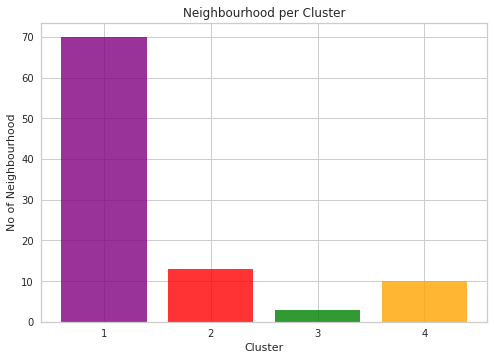

In [37]:
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
performance = Toronto_GYM['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['Purple', 'red', 'green','Orange'])
plt.xticks(y_pos, objects)
plt.ylabel('No of Neighbourhood')
plt.xlabel('Cluster')
plt.title('Neighbourhood per Cluster')

plt.show()

In [38]:
Toronto_GYM.groupby('Cluster Labels').count().reset_index()

,Cluster Labels,Neighborhood,GYM_T
0,0,70,70
1,1,13,13
2,2,3,3
3,3,10,10


#### Average GYM in Neighbourhood

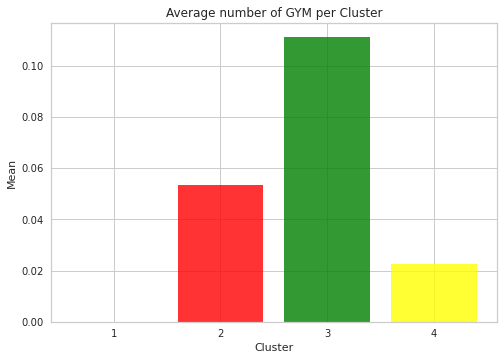

In [40]:
clusters_mean = [Toronto_Cluster1['GYM_T'].mean(),Toronto_Cluster2['GYM_T'].mean(),Toronto_Cluster3['GYM_T'].mean(),
                 Toronto_Cluster4['GYM_T'].mean()]
objects = (1,2,3,4)
y_pos = np.arange(len(objects))
perf = clusters_mean
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['Purple', 'red', 'green', 'yellow'])
plt.xticks(y_pos, objects)
plt.ylabel('Mean')
plt.xlabel('Cluster')
plt.title('Average number of GYM per Cluster')

plt.show()

In [41]:
Toronto_GYM.groupby('Cluster Labels').mean().reset_index()

,Cluster Labels,GYM_T
0,0,0.000000
1,1,0.058555
2,2,0.111111
3,3,0.023083


## 6. Discussion and Conclusion

Most of th GYMs are in Cluster-2, Neighborhood located in Downtown Toronto is having highest no of GYM in it.Neighborhood Commerce Court and First Canadian Place having 5 GYM these location.East York, Mississauga and North York is having less GYM in these loctions, each contains 1 GYM 
After Downtown Toronto North York is having 19 Neighborhoods in it. but less No of GYM venues. So North York is suitalbe for opening New GYM.The second-best Borough that have a great opportunity would be Scarborough. which is not having any GYM Venues. Cluster-1 will be having more no of Neighborhoods in North York and Scarborough and Cluster-1 is not having GYM venues in it.So Cluster-1 Neighborhoods will be the best location to open a New GYM. Some of the drawbacks of this analysis are — the clustering is completely based on data obtained from the Foursquare API.Also, the analysis does not take into consideration of the population across neighbourhoods as this can play a huge factor while choosing which place to open a new GYM or Fitness Center.

This concludes the optimal findings for this project and recommends the entrepreneur to open a GYM or Fitness Center in these locations with little to no competition. To end off this project, We utilized numerous Python libraries to fetch the information, control the content and break down and visualize those datasets. We have utilized Foursquare API to investigate the settings in neighbourhoods of Toronto, get a great measure of data from Wikipedia which we scraped with the Beautifulsoup Web scraping Library. We also visualized utilizing different plots present in seaborn and Matplotlib libraries. Similarly, we applied AI strategy to anticipate the error given the information and utilized Folium to picture it on a map, We can utilize this venture to investigate any situation, for example, opening an alternate cuisine or opening of a Movie Theater and so forth. Ideally, this task acts as an initial direction to tackle more complex real-life problems using data science.


## References

Wikipedia content: https://en.wikipedia.org/wiki/Toronto

CSV for Coordinate data: http://cocl.us/Geospatial_data

Foursquare API

Statistics Data on GYM :
https://www.ibisworld.com/canada/market-research-reports/gym-health-fitness-clubs-industry/

https://www.statista.com/outlook/313/108/fitness/canada#market-users

https://www.cfa.ca/blog/new-year-new-franchise-opportunities-with-franchise-canada-2/